# **Classifying Textual Data with pretrained Vision Models through Transfer Learning and Data Transformations**

# Introduction

Text classification and sentiment analysis are two important and common tasks in Natural Language Processing (NLP). Sentiment analysis is an example of text classification that help us reveal the real emotion and feeling beyond a comment or message. With massive improvements in recent years in the area of NLP especially introducing attention mechanism and transformer architecture, models with help of these new tools in particular rich BERT embeddings achieved high performance across diverse NLP tasks.

Another progressive field of Artificial Intelligence (AI) is Computer Vision. After Introduction of Convolutional Neural Networks (CNNs) and pretraining them on the huge Imagenet dataset, we achieved a powerful benchmark in this field and now you can use pretrained CNNs like ResNet to solve different vision tasks properly.

Although these two fields have been witnessed major breakthroughs, but still the models in each of them are mostly task-specific and It is hard to use them across different fields. In this paper, the aim was to reduce the gap between these two fields they proposed to use the knowledge acquired by benchmark Vision Models which are trained on ImageNet to help a much smaller architecture learn to classify text. For this purpose, IMDB dataset has chosen. This dataset contains 50000 reviews from IMDB users that have positive or negative labels.

A data transformation technique is used to create a new image dataset from text dataset, where each image represents a sentence embedding from the last six layers of BERT, projected on a 2D plane using a t-SNE based method. They trained five models containing early layers sliced from vision models which are pretrained on ImageNet, on the created image dataset for the IMDB dataset embedded with the last six layers of BERT. Despite the challenges posed by the very different datasets, experimental results achieved by this approach which links large pretrained models on both language and vision, are very promising, without employing compute resources.

Before proceeding to further sections and details of algorithm, it is better to get familiar with some of the key elements and defitions and also related works. So let's deep dive in them!


# Preiliminaries and Related Works

## BERT

BERT Embeddings are contextualized word representations that capture the meaning of a word based on the surrounding words in a sentence. They are created using the Bidirectional Encoder Representations from Transformers (BERT) model, a deep learning model that has been trained on a massive dataset of text and code. BERT Embeddings are more powerful than traditional word embeddings, such as Word2Vec and GloVe, because they can take into account the context of a word, which can help to improve the performance of natural language processing (NLP) tasks.
Here's a more detailed explanation of how BERT Embeddings work:
1.	**Tokenization**: The input text is first broken down into individual tokens, which can be words, punctuation marks, or other characters.
2.	**WordPiece Embeddings**: Each token is converted into a vector representation using WordPiece Embeddings. WordPiece is a subword segmentation algorithm that breaks down words into smaller units, allowing BERT to handle out-of-vocabulary words.
3.	**Segment Embeddings**: Segment embeddings are added to each token to distinguish between different segments of text, such as sentences in a dialogue or paragraphs in a document. This helps BERT understand the relationships between different parts of the text.
4.	**Positional Embeddings**: Positional embeddings are added to each token to indicate its position in the sequence of tokens. This helps BERT understand the order of words in a sentence and how they relate to each other.
5.	**Transformer Encoders**: The token embeddings, segment embeddings, and positional embeddings are then fed into a series of transformer encoders. These encoders are able to capture the relationships between words in a sentence and extract contextual information.
6.	**Contextualized Word Embeddings**: The final output of the transformer encoders is a set of contextualized word embeddings. These embeddings represent the meaning of each word in the context of the surrounding words.

BERT Embeddings can be used for a variety of NLP tasks, including:
*	Sentiment Analysis: Classifying the sentiment of text, such as whether it is positive, negative, or neutral.
*	Question Answering: Answering questions about a given passage of text.
*	Natural Language Inference: Determining whether a hypothesis is supported by a given premise.
*	Machine Translation: Translating text from one language to another.



![](https://drive.google.com/uc?export=view&id=1qQWGmFDeK5YYnoZPBPwBmWrbPisoF0J3)

## t-SNE and DeepInsight Method

t-SNE (t-distributed Stochastic Neighbor Embedding) is a dimensionality reduction method like PCA. It was developed by Laurens van der Maaten and Geoffrey Hinton in 2008. But what is the difference between PCA and t-SNE? t-SNE is a non-linear dimensionality reduction technique and it allows us to separate data that can not be separated by any straight line. The following image depicts linearly non-separable data that applying PCA will not return  promising results:


![](https://drive.google.com/uc?export=view&id=1Njf7Mw9LVIc9XTtNwYk2aPMuULIOB0kP)

t-SNE focuses on maintaining the pairwise similarities between data points in both the original high-dimensional space and the reduced low-dimensional space. It defines probability distributions over pairs of high-dimensional and low-dimensional data points, aiming to keep similar points close together. t-SNE employs a student's t-distribution to measure similarities, assigning higher probabilities to similar points and lower probabilities to dissimilar ones.

Student's t-distribution (or simply the t-distribution) is a continuous probability distribution that generalizes the standard normal distribution. It is symmetric around zero and bell-shaped. Although it has heavier tails and the amount of probability mass in the tail controlled by a parameter.

An application of t-SNE is in CNNs. Deep CNN networks are basically black boxes. There is no way to really interpret what’s on deeper levels in the network. A common explanation is that deeper levels contain information about more complex objects. But that’s not completely true, you can interpret it like that but data itself is just a high-dimensional noise for humans. But, with the help of t-SNE you can create maps to display which input data seams “similar” for the network.

Now it's turn for DeepInsight Method! This method was proprosed in the paper "A methodology to transform non-image data to an image for CNN architecture". DeepInsight is a methodology designed to transform non-image data into a format suitable for CNN architectures. This approach is particularly useful for domains like genomics, where the data is often non-image, such as DNA sequences or gene expression profiles. The goal is to leverage the power of CNNs, which are traditionally applied to image data, for the analysis of non-image datasets.

To do this transformation, t-SNE or K-PCA is used to project the transpose of dataset creating a set of features related on a 2D plane according to their similarity, re-transposing the set to obtain the original set size with [NxNx3] images as new samples.

The following image presents deepinsght pipeline. In the (a) we can see that how a feature vector converts to a feature matrix. (b) illustrates steps in deepinsight methodology. At the end of this pipeline, we will have image pixels coordinates:



![](https://drive.google.com/uc?export=view&id=1m-2P-VuP2CygZjEGe1OaRdcYS9mQvdWf)

## Transfer Learning

Transfer learning is a machine learning technique that involves leveraging knowledge gained from solving one task to improve performance on a different but related task. The process typically involves pre-training a model on a large dataset for a source task and then adapting the learned knowledge to a new model for a target task. This approach is particularly useful when labeled data for the target task is limited or expensive to obtain.

In the field of NLP, Transfer learning often starts with pre-trained language models, such as BERT, GPT, or RoBERTa. These models are trained on extensive datasets to learn contextualized representations of language. They commonly use the [CLS] representations from certain layers as an input to a classifier, freezing the BERT model or finetuning it depending on the task and size of task dataset.
Vision models mostly have pretrained on ImageNet dataset and They are powerful benchmarks presenting high accutacies across different vison tasks.


## CNN for Text Classification

One work is presented by Yoon Kim in "CNN for sentence classification" paper. In this work, A CNN based architecture with multiple filter widths and feature maps, and a fully connected layer together with padding used to produce input vectors of a fixed length.

Another work in this field is "Towards story-like visual explanations by watching movies and reading book". Sentence classification is achieved using Word2Vec embeddings and applying different filter regions on them.


# Method

## Generating the imdb-image dataset

### BERT Embedding Generation

In BERT, the [CLS] token that is added at the beginning of a sentence embedding at each layer output, which is the indicator of the beginning of a sentence and is also a unique Sentence Representation for classification purposes. For each input sentence in IMDB dataset, the [CLS] embeddings from the last six layers are concatenated  giving a [6x768] sized vector for each input sample.

### Transforming BERT Embeddings into Images

After that we obtained Embeddings, our dataset has this shape: [50000, 4608]. We have n = 50000
samples, with d = 4608 features for each sample. The dataset
can be defined as $D = {{x_1, x_2,..., x_n}}$.  Each feature
vector $x$ can be defined as $x = f_1, f_2,..., f_d$, the feature set is
now defined as $F = x_1 x_2,..., x_n$, where $F = D^T$. It allows us to treat features as elements and transposing
the instance-feature matrix allows for features to be treated as
elements that can be projected on a 2D plane according to
similarities between samples in the dataset.

The obtained 2D
plane has shown in the following image, it represents the location of features
according to t-SNE projection of the feature-instance matrix.

![](https://drive.google.com/uc?export=view&id=12LRXhRH3TZ77SwiO1kMrUk1okILSoIxf)

To improve image quality, the Convex Hull algorithm isolates the rectangle containing all points (the last image). The rectangle is then rotated to create a horizontal matrix of Cartesian coordinates for pixels. Since feature values are continuous, multiple features may be associated with a single location. Therefore, during mapping, features are averaged to generate a discrete space of pixels. To avoid overlapping features and respect hardware limitations, a fixed size of [50x50] is chosen for the pixel space.

## Data Domains and Transfer Learning

### Data Domains

Generated IMDB-Image dataset and ImageNet Dataset are extremely different according to below image, which causes a distribution mismatch and domain shift problems to the classifiers. One way to solve this problem in transfer learning is Domain Adaption.

![](https://drive.google.com/uc?export=view&id=1OFcpuPU175hn4wx9STl4fw4aL6LdDiuk)

### Transfer Learning

For a successful Transfer Learning to be achieved, an architecture should be able to adapt the Target
Domain  to Source Domain, which are IMDB-images and ImageNet. In this work, they focused on features that both datasets share instead of forcing the model to learn the domains themselves as targets because our dataset is small-in-size and it will cause overfitting.

The
color channels are clearly going to cause a major domain shift .To address this, it's often helpful to focus on geometric features like edges, curves, and blobs. To enhance these features, Z normalization can be applied to adjust image contrast and improve pixel space clarity. This technique can help provide more defined edges and enhance the overall image quality:


![](https://drive.google.com/uc?export=view&id=1kl5j2yozQO95rD8C4-KJ2kRsIOUcgM85)

$\chi= [x_1, x_2,..., x_n]$ is a set of input vectors, $\mu$ and $\sigma$ are the mean
and standard deviation of the entire image pixel space, $\epsilon$ is a small
value to prevent dividing by zero. In the following, you can see an image before and after applying Z-normalization:

![](https://drive.google.com/uc?export=view&id=1y_db1R6ZoYS7HC3RA-QhXGRrAbVTphOZ)

## Architectures


Since The IMDB-Image dataset is too small compared to ImageNet dataset, we are in danger of overfitting in the process of training. In the overall architecture, the Convolutional Feature Extractors
are sliced from their original pretrained models, and stacked to
a Convolutional Auto-Encoder with randomly initialized parameters,
followed by a Dense Classifier. To avoid overfitting problem, the pretrained feature extractors would be freezed. In the following image, the overall architecture has shown:


![](https://drive.google.com/uc?export=view&id=1ePYxSbV3pmakqzsXRHyKXjKFnlxvMycW)

To compare different models and watch their effects on the overall results, they examined multiple pretrained feature extractors. In the following list, you can see the details about usage of different extractors and the layers which has chosen from them:


*   **AlexNet**: They used the first two pretrained
Convolutional Layers, outputs 192 feature maps for each
input image from the IMDB-image dataset.
*   **ResNet**: A deep residual model that they used the first downsampling Convolutional
layer and the first residual layer from it.
*   **ResNext**: An aggregated version of the last
ResNet. For the feature extractor,
the first Convolutional layer and the first Residual layer are
used.
*   **ShuffleNet V2**: The first Convolutional layer followed
by Batch normalization and stage2
*   **VGG16**: only the first 12 layers,
containing 4 Convolutional layers are used.



# IMDB Dataset

IMDB dataset having 50K movie reviews for natural language processing or Text analytics.
This is a dataset for binary sentiment classification containing substantially more data than previous benchmark datasets.

**Import Libraries**

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer

from bs4 import BeautifulSoup
import re, string, unicodedata

import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
nltk.download('wordnet')
nltk.download('stopwords')
eng_stop_words = stopwords.words('english')

%matplotlib inline
sns.set(color_codes=True)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


IMDB dataset just has two columns: **"review"** and **"sentiment"**, "sentiment" has two unique values: "positive" and "negative":

In [7]:
path = "/content/drive/MyDrive/imdb/IMDB Dataset.csv"
df = pd.read_csv(path)
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


Overall, we have 50000 review in this dataset:

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


According to this info, there are some duplicate values in the dataset, it means that some of reviews were repeated and we should remove them in next steps:

In [9]:
df.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


Both classes have the same number of reviews. Fortunately, our dataset is balanced!

In [10]:
df['sentiment'].value_counts()

positive    25000
negative    25000
Name: sentiment, dtype: int64

There is no null value in the dataset:

In [11]:
df.isna().sum()

review       0
sentiment    0
dtype: int64

Before removing duplicate reviews, it is good to take a look at them:

In [12]:
df[df['review'].duplicated()].sort_values('review')

,review,sentiment
47467,"""Go Fish"" garnered Rose Troche rightly or wron...",negative
31488,"""Three"" is a seriously dumb shipwreck movie. M...",negative
47527,"""Witchery"" might just be the most incoherent a...",negative
32260,'Dead Letter Office' is a low-budget film abou...,negative
22449,(Spoilers)<br /><br />Oh sure it's based on Mo...,negative
...,...,...
27728,this is the worst film I've seen in a long lon...,negative
45253,this movie begins with an ordinary funeral... ...,negative
47876,this movie sucks. did anyone notice that the e...,negative
44122,"well, the writing was very sloppy, the directi...",negative


Now all duplicate reviews are removed!

In [13]:
df.drop_duplicates(inplace=True)

After the removing process, both classes do not have the same number of examples exactly, but still we have a balanced dataset:

In [14]:
df['sentiment'].value_counts()

positive    24884
negative    24698
Name: sentiment, dtype: int64

## EDA and Data Cleaning

We take a look at the statistics of dataset before and after data cleaning and we will see that how things will change. Firstly, we analyze data before cleaning:

**Review Length (Positive and Negative)**

At first, we separate positive and negative reviews to analyze each of them especially:

In [15]:
count_good = df[df['sentiment'] == 'positive']
count_bad = df[df['sentiment'] == 'negative']

In [16]:
count_good_words = count_good['review'].str.split().apply(lambda x: len(x))
count_bad_words = count_bad['review'].str.split().apply(lambda x: len(x))

It seems that negative reviews have a more diverse range of lengths while a great number of positive reviews have a length between 0 to 250:

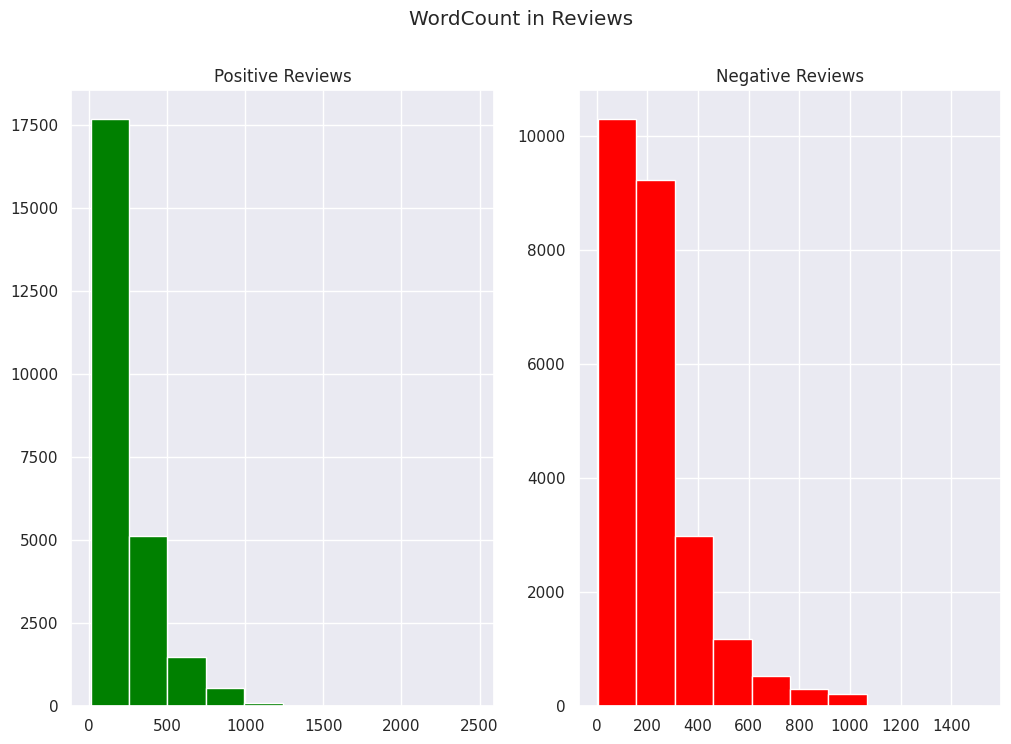

In [17]:
fig,(ax1,ax2) = plt.subplots(1, 2, figsize=(12, 8))
ax1.hist(count_good_words, color='green')
ax1.set_title('Positive Reviews')
ax2.hist(count_bad_words, color='red')
ax2.set_title('Negative Reviews')
fig.suptitle('WordCount in Reviews')
plt.show()

**Word Cloud**

Now we want to visualize the word cloud for our dataset. It will show us which words has repeated mostly in the dataset:

In the first step, we plot WordCloud for all of the reviews. Among the words that are completeley related to movies, there are "br" values. It seems that they are html tags and we should clean them from the text:

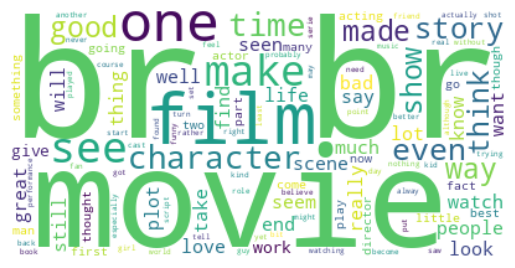

In [18]:
wc = WordCloud(background_color="white", max_words=2000, max_font_size=256, random_state=42)
wc.generate(' '.join(df['review']))
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
plt.show()

Here are the WordClouds for positive and negative reviews. In postive reviews, a word like "Love" is repeated more:

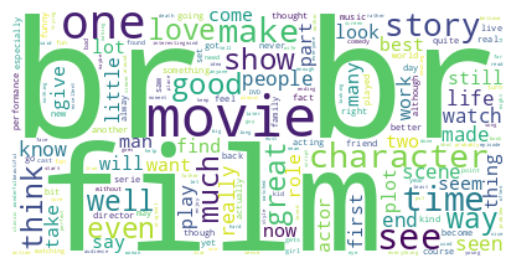

In [19]:
wc = WordCloud(background_color="white", max_words=2000, max_font_size=256, random_state=42)
wc.generate(' '.join(count_good['review']))
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
plt.show()

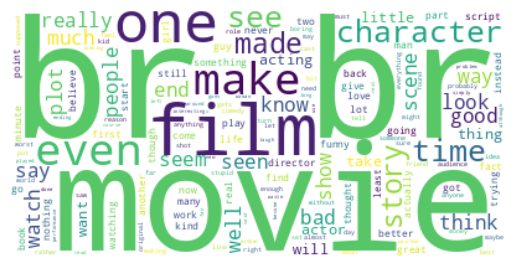

In [20]:
wc = WordCloud(background_color="white", max_words=2000, max_font_size=256, random_state=42)
wc.generate(' '.join(count_bad['review']))
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
plt.show()

**N-gram Analysis**

An n-gram is a collection of n successive items in a text document that may include words, numbers, symbols, and punctuation. Here we focus on Unigram, Bigram and Trigram:

In [21]:
def top_n_grams(text, count, gram):

    """ text: corpus we want to analyze
        count: number of top n-grams we want to show
        gram: determines n-gram
    """
    vector = CountVectorizer(ngram_range=(gram, gram)).fit(text)
    bag_of_words = vector.transform(text)
    sum_words = bag_of_words.sum(axis=0)
    words_frequency = [(word, sum_words[0, idx]) for word, idx in vector.vocabulary_.items()]
    words_frequency =sorted(words_frequency, key = lambda x: x[1], reverse=True)
    return words_frequency[:count]

Unigrams are really the words that appeared mostly in the text. The words that we see in here are common English words; They are **stopwords**. Stop words are a set of commonly used words in a language. Examples of stop words in English are “a,” “the,” “is,” “are,” etc. In the natural language processing, these words are insignificant and in some tasks, it is better to remove them from the text:

In [22]:
top_unigrams = dict(top_n_grams(df['review'], 10, 1))
uni_df = pd.DataFrame(columns = ["Top_Unigrams" , 'Count'])
uni_df["Top_Unigrams"] = list(top_unigrams.keys())
uni_df["Count"] = list(top_unigrams.values())
fig = px.bar(uni_df, x="Count", y="Top_Unigrams", title='Top Unigrams in Reviews',
             orientation='h', color='Top_Unigrams')
fig.show()

Bigrams mostly are a combination of stopwords or one of them beside **"movie"** or **"film"** but the top bigram is **"br br"**, again we see html tags and the necessity to remove them:

In [23]:
top_bigrams = dict(top_n_grams(df['review'], 10, 2))
bi_df = pd.DataFrame(columns = ["Top_Bigrams" , 'Count'])
bi_df["Top_Bigrams"] = list(top_bigrams.keys())
bi_df["Count"] = list(top_bigrams.values())
fig = px.bar(bi_df, x="Count", y="Top_Bigrams", title='Top Bigrams in Reviews',
             orientation='h', color='Top_Bigrams')
fig.show()

For Trigrams, we roughly have the same scenario as Bigrams:

In [24]:
top_trigrams = dict(top_n_grams(df['review'], 10, 3))
tri_df = pd.DataFrame(columns = ["Top_Trigrams" , 'Count'])
tri_df["Top_Trigrams"] = list(top_trigrams.keys())
tri_df["Count"] = list(top_trigrams.values())
fig = px.bar(tri_df, x="Count", y="Top_Trigrams", title='Top Trigrams in Reviews',
             orientation='h', color='Top_Trigrams')
fig.show()

### Data Cleaning

To obtain clean reviews, we will apply the following things on the reviews:


*  Remove stopwords
*  Remove HTML tags
*  Remove URLs
*  Remove punctuations
*  Remove Emojis



In [25]:
# Remove stopwords
def remove_stopwords(text):
    clean_text = []
    for i in text.split():
        if i.strip().lower() not in eng_stop_words:
            clean_text.append(i.strip().lower())
    return " ".join(clean_text)

In [26]:
# Remove HTML tags
def remove_html_tags(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

In [27]:
# Remove URLs
def remove_url(text):
    url = re.compile(r"https://\S+|www\.\S+")
    clean_text = url.sub(r'', text)
    return clean_text

In [28]:
# Remove Punctuations
def remove_punctuations(text):
    punct = re.compile(r'[^\w\s]')
    clean_text = punct.sub(r'', text)
    return clean_text

In [29]:
# Remove Emojis
def remove_emojis(text):
    emoji = re.compile(pattern = "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags = re.UNICODE)
    clean_text = emoji.sub(r'',text)
    return clean_text

In [30]:
df['review'] = df['review'].apply(lambda x: remove_stopwords(str(x)))
df['review'] = df['review'].apply(lambda x: remove_html_tags(str(x)))
df['review'] = df['review'].apply(lambda x: remove_url(str(x)))
df['review'] = df['review'].apply(lambda x: remove_punctuations(str(x)))
df['review'] = df['review'].apply(lambda x: remove_emojis(str(x)))

<ipython-input-26-591478c52229>:3: MarkupResemblesLocatorWarning:

The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.



The last step to clean the dataset is **"Lemmatizing"**. Lemmatization is a text pre-processing technique used in NLP models to break a word down to its root meaning to identify similarities.

Text tokenizers will treat the words with same root but different structure separately and they will be encoded differently. Lemmatizing will help us to reduce this problem:

In [31]:
def lemmatize_text(text):
    lemmatizer = WordNetLemmatizer()
    root_text = []
    for word in text.split():
        root_text.append(lemmatizer.lemmatize(word))
    return " ".join(root_text)

In [32]:
df['review'] = df['review'].apply(lambda x: lemmatize_text(str(x)))

Now it's time to see model stats after cleaning:

In [33]:
count_good = df[df['sentiment'] == 'positive']
count_bad = df[df['sentiment'] == 'negative']

In [34]:
count_good_words = count_good['review'].str.split().apply(lambda x: len(x))
count_bad_words = count_bad['review'].str.split().apply(lambda x: len(x))

With removing unnecessary elements, now our reviews are shorter:

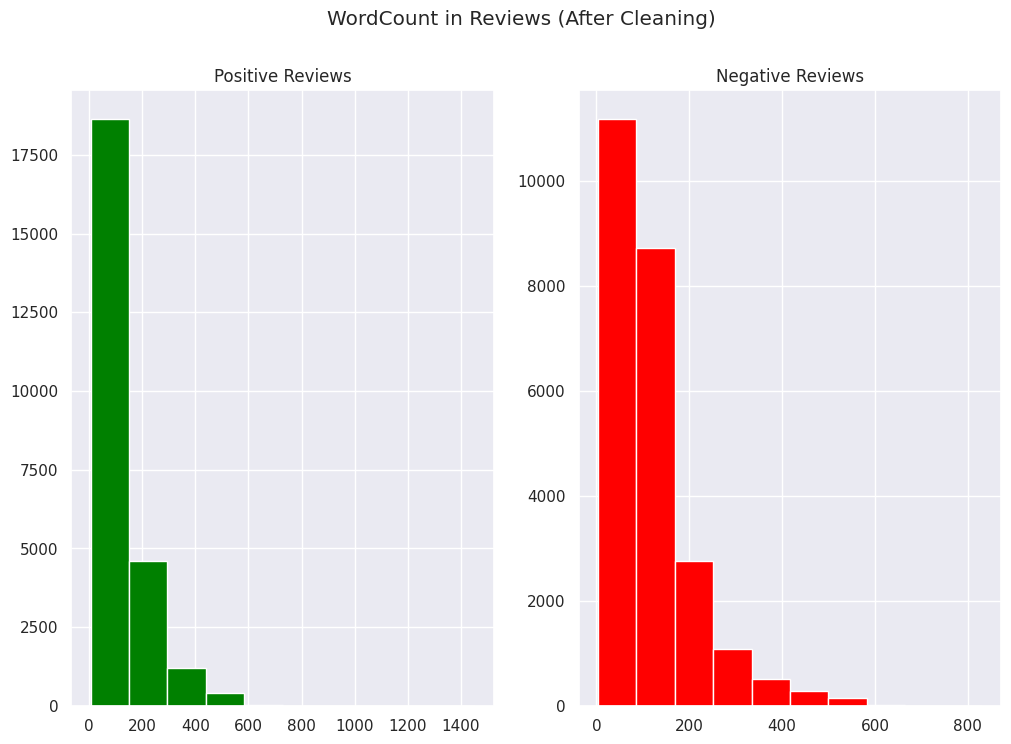

In [35]:
fig,(ax1,ax2) = plt.subplots(1, 2, figsize=(12, 8))
ax1.hist(count_good_words, color='green')
ax1.set_title('Positive Reviews')
ax2.hist(count_bad_words, color='red')
ax2.set_title('Negative Reviews')
fig.suptitle('WordCount in Reviews (After Cleaning)')
plt.show()

last time, "br" was an important word in the wordclud but we more meaningful words in the cloud:

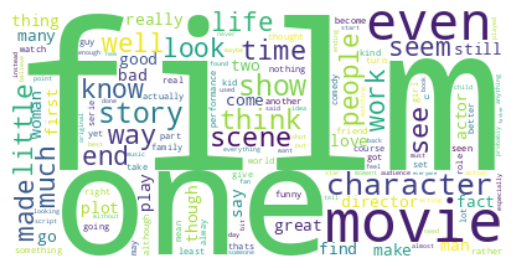

In [36]:
wc = WordCloud(background_color="white", max_words=2000, max_font_size=256, random_state=42)
wc.generate(' '.join(df['review']))
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
plt.show()

After removing stopwords, we see more related words as unigrams:

In [37]:
top_unigrams = dict(top_n_grams(df['review'], 10, 1))
uni_df = pd.DataFrame(columns = ["Top_Unigrams" , 'Count'])
uni_df["Top_Unigrams"] = list(top_unigrams.keys())
uni_df["Count"] = list(top_unigrams.values())
fig = px.bar(uni_df, x="Count", y="Top_Unigrams", title='Top Unigrams in Reviews (After Cleaning)',
             orientation='h', color='Top_Unigrams')
fig.show()

Now we see more intresting combinations in bigram section:

In [38]:
top_bigrams = dict(top_n_grams(df['review'], 10, 2))
bi_df = pd.DataFrame(columns = ["Top_Bigrams" , 'Count'])
bi_df["Top_Bigrams"] = list(top_bigrams.keys())
bi_df["Count"] = list(top_bigrams.values())
fig = px.bar(bi_df, x="Count", y="Top_Bigrams", title='Top Bigrams in Reviews (After Cleaning)',
             orientation='h', color='Top_Bigrams')
fig.show()

It is interesting that in this part we have some expressions that "**worst**" is a word in them:

In [40]:
top_trigrams = dict(top_n_grams(df['review'], 10, 3))
tri_df = pd.DataFrame(columns = ["Top_Trigrams" , 'Count'])
tri_df["Top_Trigrams"] = list(top_trigrams.keys())
tri_df["Count"] = list(top_trigrams.values())
fig = px.bar(tri_df, x="Count", y="Top_Trigrams", title='Top Trigrams in Reviews (After Cleaning)',
             orientation='h', color='Top_Trigrams')
fig.show()

# References

https://www.kaggle.com/code/madz2000/sentiment-analysis-cleaning-eda-bert-88-acc

https://www.kaggle.com/code/colearninglounge/nlp-data-preprocessing-and-cleaning

https://towardsdatascience.com/t-sne-clearly-explained-d84c537f53a